In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus   import stopwords
from gensim.models import Word2Vec
from collections   import Counter

import matplotlib.pyplot as plt
import pandas            as pd
from bs4 import BeautifulSoup
import requests
import random
import hashlib
import nltk
# nltk.download('stopwords')

stopwords = stopwords.words('english')

In [2]:
df = pd.read_csv('Final_Events.csv')
df.head(n=1)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,Mar 8,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [37]:
row_val = ''.join(df.iloc[0].to_numpy())
print(row_val)
print(row_val.encode())
hashlib.sha256(row_val.encode()).hexdigest()

PGL Wallachia S3Full information about PGL Wallachia S3 Dota 2. Match results, VODs, streams, team rosters, schedulesMar 8Sat, Mar 8https://ggscore.com/en/dota-2/pgl-wallachia-season-3PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9ABucharest, Romaniahttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-PK95Lpvm8Bzooz6K5VyeLpb58FtbvM8buCVAA6LvBRubnB8wEf8NwkA&shttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGbArTsTUfuDh6TSJ-RXCMb23odAyP2FJFV2VEKkflEA&s=10
b'PGL Wallachia S3Full information about PGL Wallachia S3 Dota 2. Match results, VODs, streams, team rosters, schedulesMar 8Sat, Mar 8https://ggscore.com/en/dota-2/pgl-wallachia-season-3PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9ABucharest, Romaniahttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-PK95Lpvm8Bzooz6K5VyeLpb58FtbvM8buCVAA6LvBRubnB8wEf8NwkA&shttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGbArTsTUfuDh6TSJ-RXCMb23odAyP2FJFV2VEKkflEA&s=10'


'3dce6439e09b1113ca2a6aa807ffc443934e1cd561caf65f44066e816e485dc7'

In [3]:
url = random.choice(df['Main Page'])
url

'https://fanexpohq.com/fanexpochicago/'

In [61]:
a = [i for i in range(20)]

In [80]:
def get_sublinks(webpage: BeautifulSoup):
    """Looks for urls with prefix: http"""
    links = set()
    for link in webpage.find_all("a"):
        url = link.get("href")
        if not url:
            continue
        if url.startswith('http'):
            links.add(url)
    return list(links)[:10]

def obtain_desc(url):
    try:
        items = requests.get(url, timeout=5, verify=True)
    except requests.exceptions.Timeout:
        # print('Timed Out')
        return ''
    except Exception as e:
        return ''
    soup  = BeautifulSoup(items.content,'html.parser')
    tokenizer = RegexpTokenizer(r'\w+')
    #links = [url]
    #links.extend(get_sublinks(webpage=soup))

    def extract_text(ls):
        tokenizer = RegexpTokenizer(r'\w+')
        desc = ''
        for link in ls:
            data = requests.get(url)
            soup  = BeautifulSoup(data.content,'html.parser')
            raw_text = soup.get_text()
            text_data = " ".join(tokenizer.tokenize(raw_text))
            desc += f" {text_data}"

        return desc

    return " ".join(tokenizer.tokenize(soup.get_text())) # extract_text(links)

# context_data = obtain_desc(url)

In [66]:
from tqdm import tqdm

In [81]:
# Expensive!
result = {}
for idx, url in tqdm(enumerate(df['Main Page'])):
    desc_included = df['Desc'].iloc[idx]
    context_data  = obtain_desc(url)
    result[idx]   = f'{desc_included} ' + context_data

489it [05:58,  1.37it/s]


In [83]:
import json
import gzip

In [84]:
with gzip.open('Event_Context.json', 'w') as f:
    f.write(json.dumps(result).encode('utf-8'))   

In [ ]:
sentences = list(result.values())

In [88]:
tokenizer = RegexpTokenizer(r'\w+')

In [89]:
words     = [tokenizer.tokenize(d.lower()) for d in sentences ]
words     = [[w for w in d if w not in stopwords] for d in words]

In [91]:
model = Word2Vec(sentences=words, vector_size=100, window=3, min_count=2)

In [94]:
# model.wv.index_to_key

In [106]:
model.wv.similar_by_key('concerts')

[('near', 0.9834826588630676),
 ('parties', 0.9832549095153809),
 ('nightlife', 0.981450080871582),
 ('comedy', 0.9805639982223511),
 ('performances', 0.9771867990493774),
 ('anywhere', 0.9741024971008301),
 ('music', 0.9725580215454102),
 ('shows', 0.9697945713996887),
 ('marquette', 0.9669652581214905),
 ('zurich', 0.9653514623641968)]

In [ ]:
from sklearn.manifold import TSNE 
import seaborn as sns

In [97]:
enc = TSNE(n_components=2, random_state=42)

In [98]:
cord = enc.fit_transform(model.wv.vectors)

In [82]:
#model.wv.index_to_key

/Users/avaldivia/Documents/GitHub/Event-Aggregator/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/avaldivia/Documents/GitHub/Event-Aggregator/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/avaldivia/Documents/GitHub/Event-Aggregator/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/avaldivia/Documents/GitHub/Event-Aggregator/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/avaldivia/Documents

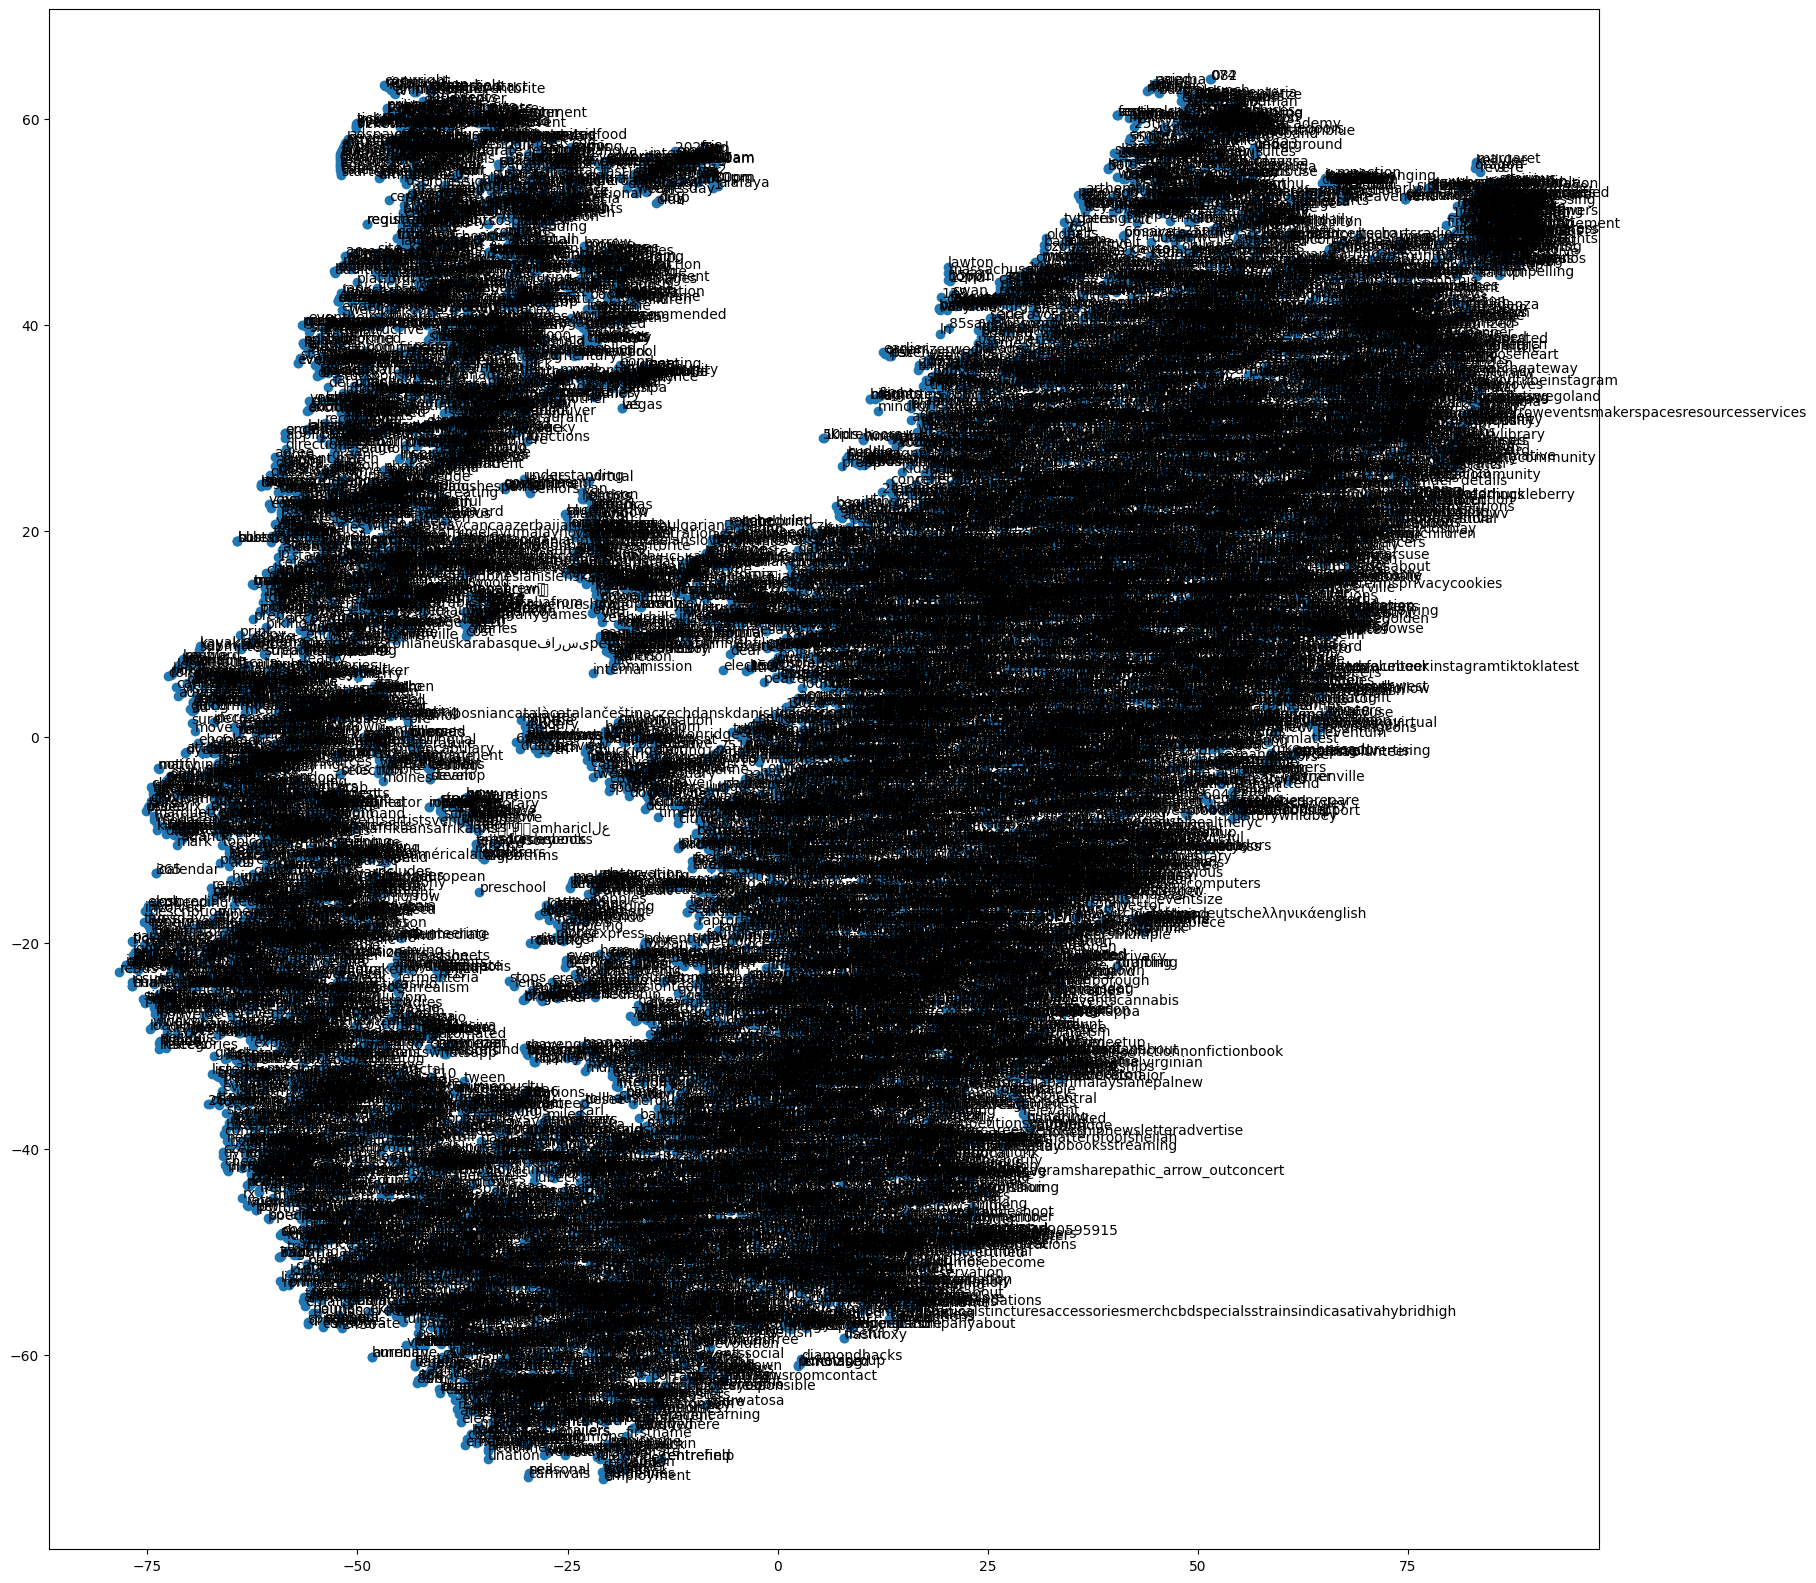

In [99]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot()
plt.scatter(x = cord[:,0], y = cord[:,1])
for idx , w in enumerate(model.wv.index_to_key):
    ax.text(cord[idx,0],cord[idx,1], s = w)
plt.show()